#### Homework Assignment-3_Aastha Malhotra

# Purchase model using e-commerce data

## Import Packages

In [1]:
# data processing
import numpy as np
import pandas as pd
from datetime import date
import datetime as dt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from functools import reduce
# plotting
import matplotlib.pyplot as plt
import seaborn as sns


### Setup

In [2]:
# full path of the orders dataset
orders_file = '../data/olist_orders_dataset.csv'

# full path of the customer dataset
cust_file = '../data/olist_customers_dataset.csv'

### Read files

In [3]:
orders = pd.read_csv(r"../data/olist_orders_dataset.csv", encoding='ISO-8859-2')

customers = pd.read_csv(r"../data/olist_customers_dataset.csv", encoding='ISO-8859-2')


In [4]:
orders.shape

(99441, 8)

In [5]:
#Convert order timestamps into dates

orders[['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date',
    'order_delivered_customer_date','order_estimated_delivery_date']]=orders[[
    'order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date',
    'order_delivered_customer_date','order_estimated_delivery_date']].apply(pd.to_datetime)

## Exploratory

In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [7]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Merge Orders and Customers dataframes

In [8]:
orders_cust = pd.merge(orders, customers, on='customer_id', how ='inner')
orders_cust.shape

orders_cust

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [9]:
orders_cust.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [10]:
#Include only delivered order status in the dataframe
orders_cust = orders_cust[orders_cust['order_status'] == 'delivered']
orders_cust.shape

(96478, 12)

### Binary Classification Model : DATA PREPARATION

Let's build a model to predict whether a customer will make atleast one purchase during the prediction window 

Use January 2018 through July 2018, as the prediction window. In other words, use all available data prior to January 2018 to predict which customers will make a purchase during the prediction window.

In [11]:
snapshot_date = date(2017, 12, 31)

For creating model attributes (features), restrict data to the timeframe prior to the prediction window.

In [12]:
mask = orders_cust['order_purchase_timestamp'].dt.date <= snapshot_date

mask.head()

0     True
1    False
2    False
3     True
4    False
Name: order_purchase_timestamp, dtype: bool

In [13]:
# apply the filter

df_merged = orders_cust[mask]

len(orders), len(df_merged)

(99441, 43695)

In [14]:
df_merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,39382392765b6dc74812866ee5ee92a7,99655,faxinalzinho,RS


In [15]:
# check the max date

df_merged.order_purchase_timestamp.max()

Timestamp('2017-12-31 23:29:31')

### Attribute #1: Order recency

To calculate recency (days since the most recent order), extract the most recent date for each customer.

In [16]:
def order_recency(df_merged, snapshot_date):
    #Attribute #1: Order recency
    # grab the max purchase date for each customer
    max_cust_recency = df_merged.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
    
    # count the number of days between the most recent order date and the snapshot date
    delta = snapshot_date - max_cust_recency['order_purchase_timestamp'].dt.date
    
    # grab the number of days (as an integer) from the calculated deltas 
    max_cust_recency['order_recency'] = delta.dt.days / 30
    max_cust_recency['order_recency'] = max_cust_recency['order_recency'].astype(int)
    
    # drop the date 
    max_cust_recency = max_cust_recency.drop('order_purchase_timestamp', axis=1)
    
    return max_cust_recency


In [17]:
max_cust_recency = order_recency(df_merged, snapshot_date)
max_cust_recency

,customer_unique_id,order_recency
0,0000f46a3911fa3c0805444483337064,9
1,0000f6ccb0745a6a4b88665a16c9f078,2
2,0004aac84e0df4da2b147fca70cf8255,1
3,0005e1862207bf6ccc02e4228effd9a0,10
4,0006fdc98a402fceb4eb0ee528f6a8d4,5
...,...,...
42390,fffbf87b7a1a6fa8b03f081c5f51a201,0
42391,fffcf5a5ff07b0908bd4e2dbc735a684,6
42392,fffea47cd6d3cc0a88bd621562a9d061,0
42393,ffff371b4d645b6ecea244b27531430a,10


In [18]:
# how many records (unique customers) are there for this timeframe?
max_cust_recency.shape

(42395, 2)

This is the number of customers who are included in the modeling dasetset for this specific time-frame.

Let's check the distribution of this attribute.

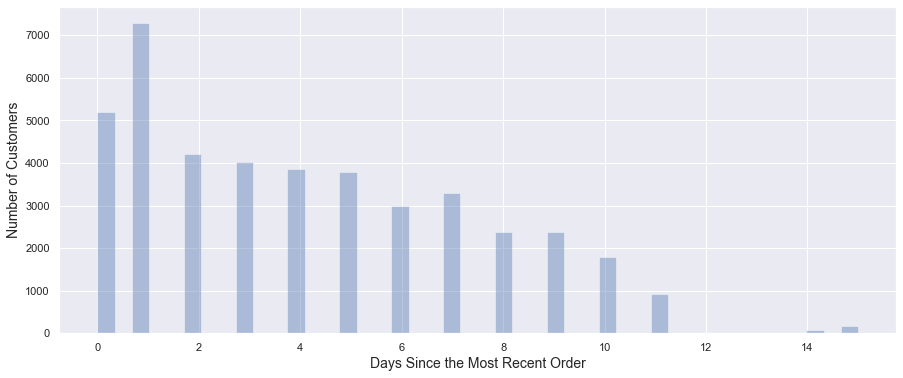

In [19]:
sns.set(style='darkgrid')

# adjust the plot size
plt.figure().set_size_inches(15, 6)

# histogram
sns.distplot(max_cust_recency['order_recency'], kde=False)

# assign axis labels
plt.ylabel('Number of Customers', fontsize=14)
plt.xlabel('Days Since the Most Recent Order', fontsize=14);

Let's take a look at the cumulative distribution of customers by recency.

In [20]:
recency_distr = max_cust_recency.groupby('order_recency').size().reset_index()

recency_distr = recency_distr.rename(columns={0: 'cust_count'})


In [21]:
# calculate cumulative percentages 

cum_pctg = recency_distr['cust_count'].cumsum() / sum(recency_distr['cust_count'])


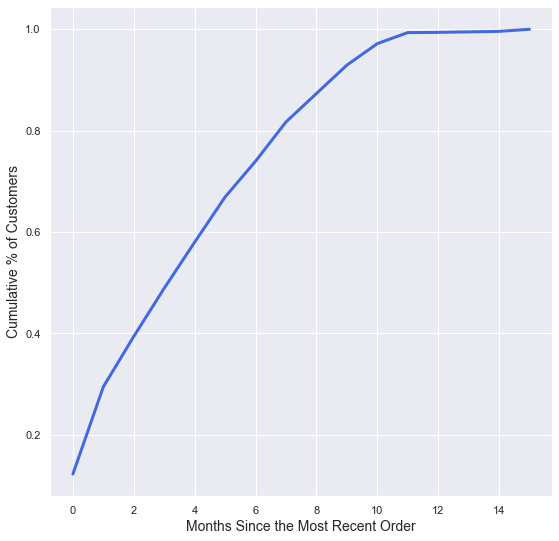

In [22]:
sns.set(style='darkgrid')

# adjust the plot size
plt.figure().set_size_inches(9, 9)

# histogram
sns.lineplot(x=recency_distr['order_recency'], y=cum_pctg, color='royalblue', lw=3)

# assign axis labels
plt.ylabel('Cumulative % of Customers', fontsize=14)
plt.xlabel('Months Since the Most Recent Order', fontsize=14);

### Attribute #2: Number of orders per customer

In [23]:
def No_of_orders(df_merged, snapshot_date):
    # count total records (i.e., orders) per customer
    cust_orders = df_merged.groupby('customer_unique_id').size().reset_index().rename(columns={0: 'total_orders'})

    return cust_orders

In [24]:
cust_orders = No_of_orders(df_merged, snapshot_date)

In [25]:
cust_orders.total_orders.value_counts()

1    41217
2     1085
3       74
4       13
5        4
8        1
6        1
Name: total_orders, dtype: int64

### Attribute set #3: Weekday

In [26]:
def weekday(df_merged):
    # Attribute set #3: Weekday

    df_merged['order_dow'] = df_merged['order_purchase_timestamp'].dt.day_name()
    
    # get dummies
    df_merged = pd.get_dummies(df_merged, columns=['order_dow'])
    
    # grab all binary columns that was just created
    dummies = [x for x in df_merged.columns if 'order_dow_' in x]
    
    # aggreagte data to the customer-level, so that there is one record per customer
    cust_dow = df_merged.groupby('customer_unique_id')[dummies].sum().reset_index()
    
    #cust_dow[cust_dow['order_dow_Monday'] > 1]
    
    return cust_dow

In [27]:
cust_dow = weekday(df_merged)

cust_dow

<ipython-input-26-acd99488dc0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['order_dow'] = df_merged['order_purchase_timestamp'].dt.day_name()


,customer_unique_id,order_dow_Friday,order_dow_Monday,order_dow_Saturday,order_dow_Sunday,order_dow_Thursday,order_dow_Tuesday,order_dow_Wednesday
0,0000f46a3911fa3c0805444483337064,1,0,0,0,0,0,0
1,0000f6ccb0745a6a4b88665a16c9f078,0,0,0,0,1,0,0
2,0004aac84e0df4da2b147fca70cf8255,0,0,0,0,0,1,0
3,0005e1862207bf6ccc02e4228effd9a0,0,0,1,0,0,0,0
4,0006fdc98a402fceb4eb0ee528f6a8d4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
42390,fffbf87b7a1a6fa8b03f081c5f51a201,0,0,0,0,0,0,1
42391,fffcf5a5ff07b0908bd4e2dbc735a684,0,0,0,0,1,0,0
42392,fffea47cd6d3cc0a88bd621562a9d061,0,0,0,1,0,0,0
42393,ffff371b4d645b6ecea244b27531430a,0,0,0,0,0,1,0


### Attribute set #4: Av. difference between order purchase date and delivery date

In [28]:
def avg_diff_order_purch_delv (df_merged):
    df_merged['Difference'] = (df_merged['order_delivered_customer_date'] - df_merged['order_purchase_timestamp']).dt.days

    # aggreagte data to the customer-level, so that there is one record per customer
    av_purch_to_del = df_merged.groupby('customer_unique_id')['Difference'].mean().reset_index(). \
    rename(columns={'Difference': 'av_purch_to_del'})
    
    return av_purch_to_del                                                                                                                                                                                                                      

In [29]:
av_purch_to_del = avg_diff_order_purch_delv(df_merged)

av_purch_to_del

<ipython-input-28-21fe87445cf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Difference'] = (df_merged['order_delivered_customer_date'] - df_merged['order_purchase_timestamp']).dt.days


,customer_unique_id,av_purch_to_del
0,0000f46a3911fa3c0805444483337064,25.0
1,0000f6ccb0745a6a4b88665a16c9f078,20.0
2,0004aac84e0df4da2b147fca70cf8255,13.0
3,0005e1862207bf6ccc02e4228effd9a0,4.0
4,0006fdc98a402fceb4eb0ee528f6a8d4,16.0
...,...,...
42390,fffbf87b7a1a6fa8b03f081c5f51a201,18.0
42391,fffcf5a5ff07b0908bd4e2dbc735a684,27.0
42392,fffea47cd6d3cc0a88bd621562a9d061,30.0
42393,ffff371b4d645b6ecea244b27531430a,14.0


In [30]:
av_purch_to_del.isnull().values.any()

True

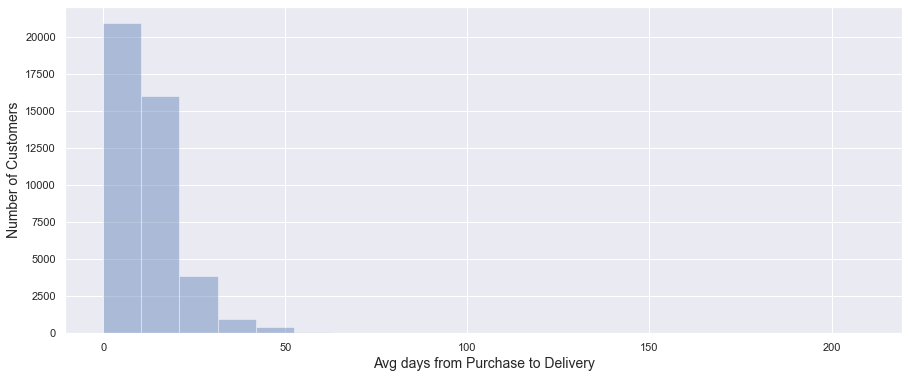

In [31]:
sns.set(style='darkgrid')

# adjust the plot size
plt.figure().set_size_inches(15, 6)

# histogram
sns.distplot(av_purch_to_del['av_purch_to_del'], kde=False, bins=20)

# assign axis labels
plt.ylabel('Number of Customers', fontsize=14)
plt.xlabel('Avg days from Purchase to Delivery', fontsize=14);

### Attribute set #5: Av. difference between order estimated and delivered date   

In [32]:
def avg_diff_order_est_delv(df_merged):
    df_merged['diff_dlv_est'] = (df_merged['order_estimated_delivery_date'] - df_merged['order_delivered_customer_date']).dt.days
    # aggreagte data to the customer-level, so that there is one record per customer
    #print(df_merged)
    av_est_to_del = df_merged.groupby('customer_unique_id')['diff_dlv_est'].mean().reset_index().rename(columns={'diff_dlv_est': 'av_est_to_del'})
    
    return  av_est_to_del
    

In [33]:
av_est_to_del = avg_diff_order_est_delv(df_merged)
#av_est_to_del
av_est_to_del

<ipython-input-32-61839a7da7f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['diff_dlv_est'] = (df_merged['order_estimated_delivery_date'] - df_merged['order_delivered_customer_date']).dt.days


,customer_unique_id,av_est_to_del
0,0000f46a3911fa3c0805444483337064,1.0
1,0000f6ccb0745a6a4b88665a16c9f078,11.0
2,0004aac84e0df4da2b147fca70cf8255,7.0
3,0005e1862207bf6ccc02e4228effd9a0,27.0
4,0006fdc98a402fceb4eb0ee528f6a8d4,11.0
...,...,...
42390,fffbf87b7a1a6fa8b03f081c5f51a201,13.0
42391,fffcf5a5ff07b0908bd4e2dbc735a684,26.0
42392,fffea47cd6d3cc0a88bd621562a9d061,2.0
42393,ffff371b4d645b6ecea244b27531430a,29.0


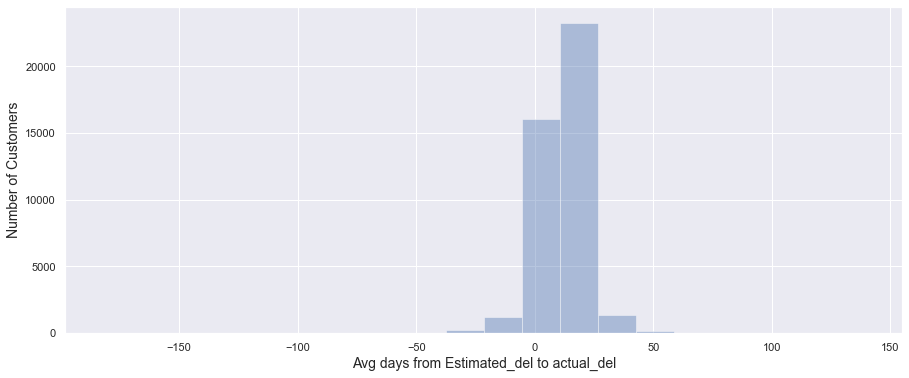

In [34]:
sns.set(style='darkgrid')

# adjust the plot size
plt.figure().set_size_inches(15, 6)

# histogram
sns.distplot(av_est_to_del['av_est_to_del'], kde=False, bins=20)

# assign axis labels
plt.ylabel('Number of Customers', fontsize=14)
plt.xlabel('Avg days from Estimated_del to actual_del', fontsize=14);

### Attribute set #6: Total count of orders on weekdays and weekends

In [35]:
def weekday_vs_weekend(df_merged):
    df_merged['total_order'] = df_merged['order_dow'].apply(lambda x: 'weekend' if x == 'Sunday' or x == 'Saturday' else 'weekday')
    df_merged = pd.get_dummies(df_merged, columns=['total_order'])
    
    dummies = [x for x in df_merged.columns if 'total_order' in x]
    #total count of orders on weekends and weekdays
    Wkend_vs_wkday = df_merged.groupby(['customer_unique_id'])[dummies].sum().reset_index()
    
    return Wkend_vs_wkday

In [36]:
Wkend_vs_wkday = weekday_vs_weekend(df_merged)

Wkend_vs_wkday

<ipython-input-35-109267ff5b8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['total_order'] = df_merged['order_dow'].apply(lambda x: 'weekend' if x == 'Sunday' or x == 'Saturday' else 'weekday')


,customer_unique_id,total_order_weekday,total_order_weekend
0,0000f46a3911fa3c0805444483337064,1,0
1,0000f6ccb0745a6a4b88665a16c9f078,1,0
2,0004aac84e0df4da2b147fca70cf8255,1,0
3,0005e1862207bf6ccc02e4228effd9a0,0,1
4,0006fdc98a402fceb4eb0ee528f6a8d4,1,0
...,...,...,...
42390,fffbf87b7a1a6fa8b03f081c5f51a201,1,0
42391,fffcf5a5ff07b0908bd4e2dbc735a684,1,0
42392,fffea47cd6d3cc0a88bd621562a9d061,0,1
42393,ffff371b4d645b6ecea244b27531430a,1,0


### Combine all attributes into a single dataframe

In [37]:
# let's check the number of records in each dataframe first

max_cust_recency.shape, cust_orders.shape, cust_dow.shape, av_purch_to_del.shape, av_est_to_del.shape, Wkend_vs_wkday.shape



((42395, 2), (42395, 2), (42395, 8), (42395, 2), (42395, 2), (42395, 3))

In [38]:
# combine (merge) attributes so that all the attributes are in one dataset
all_data_frames = [max_cust_recency, cust_orders, cust_dow, av_purch_to_del, av_est_to_del, Wkend_vs_wkday]
df_combined = reduce(lambda  left,right: pd.merge(left,right,on=['customer_unique_id'],
                                            how='outer'), all_data_frames)
#convert list into dataframe
df_combined = pd.DataFrame(df_combined)

df_combined

,customer_unique_id,order_recency,total_orders,order_dow_Friday,order_dow_Monday,order_dow_Saturday,order_dow_Sunday,order_dow_Thursday,order_dow_Tuesday,order_dow_Wednesday,av_purch_to_del,av_est_to_del,total_order_weekday,total_order_weekend
0,0000f46a3911fa3c0805444483337064,9,1,1,0,0,0,0,0,0,25.0,1.0,1,0
1,0000f6ccb0745a6a4b88665a16c9f078,2,1,0,0,0,0,1,0,0,20.0,11.0,1,0
2,0004aac84e0df4da2b147fca70cf8255,1,1,0,0,0,0,0,1,0,13.0,7.0,1,0
3,0005e1862207bf6ccc02e4228effd9a0,10,1,0,0,1,0,0,0,0,4.0,27.0,0,1
4,0006fdc98a402fceb4eb0ee528f6a8d4,5,1,0,0,0,0,0,1,0,16.0,11.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42390,fffbf87b7a1a6fa8b03f081c5f51a201,0,1,0,0,0,0,0,0,1,18.0,13.0,1,0
42391,fffcf5a5ff07b0908bd4e2dbc735a684,6,1,0,0,0,0,1,0,0,27.0,26.0,1,0
42392,fffea47cd6d3cc0a88bd621562a9d061,0,1,0,0,0,1,0,0,0,30.0,2.0,0,1
42393,ffff371b4d645b6ecea244b27531430a,10,1,0,0,0,0,0,1,0,14.0,29.0,1,0


#### Exclude customers who have not placed an order within the past one year

In [39]:
df_combined = df_combined[df_combined['order_recency'] <= 12]

In [40]:
df_combined.shape


(42136, 14)

### Assign labels (aka the target variable or the dependent variable)

For this exercise, assume that the objective of the model is to predict whether a customer will make at least one purchase in the future (i.e., within the target window of the model).

**Step 1:** Isolate all orders that were placed within the prediction window.

In [41]:
# select orders that were placed from Jan 2018 to July 2018
startdate = date(2018, 1, 1)

In [42]:
end_date = date(2018, 7, 31)

In [43]:
mask2 = orders_cust['order_purchase_timestamp'].dt.date >= startdate 
mask3 = orders_cust['order_purchase_timestamp'].dt.date <= end_date

In [44]:
#apply masks to get the test (prediction window) dataframe
test_df = orders_cust[mask2 & mask3]

test_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
12,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18,e97109680b052ee858d93a539597bba7,35400,ouro preto,MG
13,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,e2dfa3127fedbbca9707b36304996dab,4812,sao paulo,SP
14,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21,04cf8185c71090d28baa4407b2e6d600,5271,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99428,c22a47117b6a87c967b0c278488110c1,6e153567dc52ea59c0498ef5383e9c7a,delivered,2018-06-22 20:53:29,2018-06-22 21:17:45,2018-06-25 17:50:00,2018-07-03 19:48:54,2018-07-23,e930b415f39ab827ea66de80a9d36a22,13218,jundiai,SP
99430,c81f74e50f0496fa39716cc77cacd460,7b270ebc87c25c8404348c10ff80a80e,delivered,2018-03-04 22:48:38,2018-03-04 23:09:22,2018-03-05 16:15:04,2018-03-13 18:54:32,2018-03-26,324a22205906aa2612a33e63c00ca8bb,31130,belo horizonte,MG
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [45]:
# confirm the min and max dates
print (test_df['order_purchase_timestamp'].min(), test_df['order_purchase_timestamp'].max())

2018-01-01 02:48:41 2018-07-31 23:54:20


**Step 2:** Summarize data to get one record per customer.

In [46]:
# count the number of orders (will convert this into a binary flag later)

test_dataframe = test_df.groupby('customer_unique_id').size().reset_index().rename(columns={0: 'purch'})

#Customers who have purchased within the prediction window
test_dataframe['purch'] = 1

In [47]:
test_dataframe.purch.value_counts()

1    45414
Name: purch, dtype: int64

**Step 3:** Merge this dataframe with the `attr` dataframe to create the modeling dataset.

In [48]:
# merge `target_events` with the dataframe that contains customer attributes
#ones who purchase put value 1 and 0 if not

model_df = pd.merge(df_combined, test_dataframe, how='left', on='customer_unique_id')

model_df

,customer_unique_id,order_recency,total_orders,order_dow_Friday,order_dow_Monday,order_dow_Saturday,order_dow_Sunday,order_dow_Thursday,order_dow_Tuesday,order_dow_Wednesday,av_purch_to_del,av_est_to_del,total_order_weekday,total_order_weekend,purch
0,0000f46a3911fa3c0805444483337064,9,1,1,0,0,0,0,0,0,25.0,1.0,1,0,NaN
1,0000f6ccb0745a6a4b88665a16c9f078,2,1,0,0,0,0,1,0,0,20.0,11.0,1,0,NaN
2,0004aac84e0df4da2b147fca70cf8255,1,1,0,0,0,0,0,1,0,13.0,7.0,1,0,NaN
3,0005e1862207bf6ccc02e4228effd9a0,10,1,0,0,1,0,0,0,0,4.0,27.0,0,1,NaN
4,0006fdc98a402fceb4eb0ee528f6a8d4,5,1,0,0,0,0,0,1,0,16.0,11.0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42131,fffbf87b7a1a6fa8b03f081c5f51a201,0,1,0,0,0,0,0,0,1,18.0,13.0,1,0,NaN
42132,fffcf5a5ff07b0908bd4e2dbc735a684,6,1,0,0,0,0,1,0,0,27.0,26.0,1,0,NaN
42133,fffea47cd6d3cc0a88bd621562a9d061,0,1,0,0,0,1,0,0,0,30.0,2.0,0,1,NaN
42134,ffff371b4d645b6ecea244b27531430a,10,1,0,0,0,0,0,1,0,14.0,29.0,1,0,NaN


In [49]:
#replace NaN to 0 in purch column
model_df['purch'] = model_df['purch'].fillna(0)

In [50]:
model_df.purch.value_counts()

0.0    41546
1.0      590
Name: purch, dtype: int64

In [51]:
print('Number of customers who made at least one purchase durnig the prediction window: ', len(model_df[model_df['purch'] == 1.0])) 


Number of customers who made at least one purchase durnig the prediction window:  590


In [52]:
# % distribution of the target flag

model_df.purch.value_counts() / len(model_df)

0.0    0.985998
1.0    0.014002
Name: purch, dtype: float64

In [53]:
# check the correlations

model_df.corr()['purch']

order_recency         -0.013592
total_orders           0.072546
order_dow_Friday      -0.000675
order_dow_Monday       0.009807
order_dow_Saturday    -0.004326
order_dow_Sunday       0.012998
order_dow_Thursday     0.005541
order_dow_Tuesday      0.006496
order_dow_Wednesday    0.008718
av_purch_to_del       -0.010803
av_est_to_del          0.003183
total_order_weekday    0.024137
total_order_weekend    0.006820
purch                  1.000000
Name: purch, dtype: float64

#### Create a two-axis plot to view the purchase rates by recency.

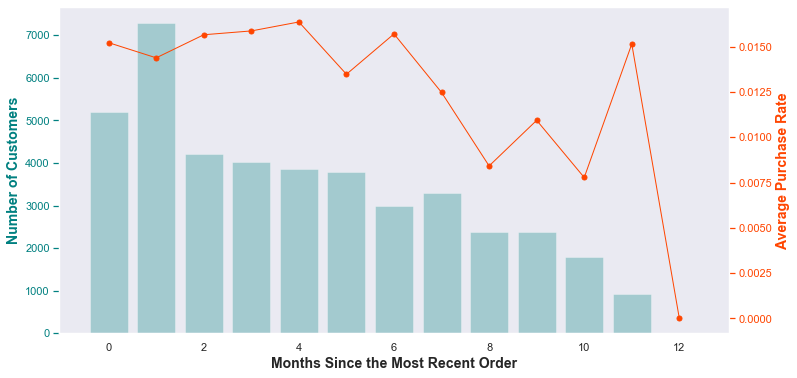

In [54]:
purch_rate_by_recency = model_df.groupby('order_recency')['purch'].mean().reset_index()
purch_rate_by_recency['orders'] = model_df.groupby('order_recency').size().reset_index()[0]

sns.set(style = 'dark')
f, ax = plt.subplots(figsize = (12, 6))

# create a secondary axis
ax2 = ax.twinx()

ax.bar(purch_rate_by_recency['order_recency'], purch_rate_by_recency['orders'], color='teal', alpha=0.3)

ax2.plot(purch_rate_by_recency['order_recency'], purch_rate_by_recency['purch'], 
         color='orangered', marker='o', markersize=5, lw=1)

ax.set_xlabel('Months Since the Most Recent Order', fontsize=14, weight='bold')
ax.set_ylabel('Number of Customers', fontsize=14, weight='bold', color='teal')
ax2.set_ylabel('Average Purchase Rate', fontsize = 14, color='orangered', weight='bold')

ax.tick_params(axis='y', colors='teal')
ax2.tick_params(axis='y', colors='orangered')

# Two-fold partition

### Create two fold partition with oversampling and without oversampling using a two_fold_partition function

In [55]:
def two_fold_partition (X, y):

    # split the dataframe into train(70%) and test(30%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)
    
    # target distribution in the trainig sample
    print('target distribution in the trainig sample')
    print(y_train.value_counts())
    print('')
    # target distribution in the test sample
    print('target distribution in the test sample')
    print(y_test.value_counts())

    return X_train, X_test, y_train, y_test

### Two fold partitioning with Oversampling

In [56]:
df_nonevents = model_df[model_df['purch'] == 0]
df_events = model_df[model_df['purch'] == 1].sample(len(df_nonevents), replace = True)

df_os_model = pd.concat([df_events, df_nonevents])
df_os_model.shape

(83092, 15)

In [57]:
#Check the column names
df_os_model.columns

Index(['customer_unique_id', 'order_recency', 'total_orders',
       'order_dow_Friday', 'order_dow_Monday', 'order_dow_Saturday',
       'order_dow_Sunday', 'order_dow_Thursday', 'order_dow_Tuesday',
       'order_dow_Wednesday', 'av_purch_to_del', 'av_est_to_del',
       'total_order_weekday', 'total_order_weekend', 'purch'],
      dtype='object')

In [58]:
#replace NaN to 0 in purch column
df_os_model = df_os_model.fillna(0)

In [59]:
# set-up X and y for oversampled data

preds = df_os_model.columns[1:-1]

X_O = df_os_model[preds]
y_o = df_os_model['purch']

X_O_train, X_O_test, y_o_train, y_o_test = two_fold_partition(X_O, y_o)

target distribution in the trainig sample
0.0    29151
1.0    29013
Name: purch, dtype: int64

target distribution in the test sample
1.0    12533
0.0    12395
Name: purch, dtype: int64


### Two fold partitioning without Oversampling

In [60]:
#replace NaN to 0 in purch column
model_df = model_df.fillna(0)

In [61]:
# set-up X and y for non oversampled data

preds = model_df.columns[1:-1]

X_NO = model_df[preds]
y_no = model_df['purch']

X_NO_train, X_NO_test, y_no_train, y_no_test = two_fold_partition(X_NO, y_no)

target distribution in the trainig sample
0.0    29071
1.0      424
Name: purch, dtype: int64

target distribution in the test sample
0.0    12475
1.0      166
Name: purch, dtype: int64


In [62]:
# check nulls if any
X_NO_train.isnull().values.any()

False

### Model accuracy

In [63]:
def model_accuracy_scores (y_test, y_preds, y_scores):

    # calcualte AUC
    AUC_score = roc_auc_score(y_test, y_scores)
    print('AUC score: ', AUC_score)
    
    # calcualte Accuracy_score
    Model_accuracy_score = accuracy_score(y_test, y_preds)
    print('Accuracy Score: ', Model_accuracy_score)
                   
    # check model's predictions against actual value of the target event
    crosstab = pd.crosstab(y_test, y_preds)
    print('')
    print('Confusion Matrix')
    print(crosstab)
    print('')
    #Precision
    average_precision = average_precision_score(y_test, y_scores)
    
    #Since it is an imbalanced dataset, need to calculate f1_score, preciaion_score and recall_score
    print('F1 score: ', f1_score(y_test, y_preds, average="macro"))
    print('Precision score: ', precision_score(y_test, y_preds, average="macro"))
    print('Recall score: ', recall_score(y_test, y_preds, average="macro"))
    
    return AUC_score


# Model Building

## Model building with oversampling

### Logistic Regression Model

In [64]:
#define the model object ('liblinear' is recommended for small datasets)
clf_O_lr = LogisticRegression(solver='liblinear', random_state=1111)
#train (fit) the model using the training sample
clf_O_lr.fit(X_O_train, y_o_train)

#make predictions on the test dataset
y_o_preds = clf_O_lr.predict(X_O_test)

# calculate the probabilities on the test dataset
y_o_scores_lr = clf_O_lr.predict_proba(X_O_test)[:, 1]

print('Mean of probability scores for LR: ', clf_O_lr.predict_proba(X_O_train)[:, 1].mean())

Mean of probability scores for LR:  0.4988283977298739


In [65]:
print('Logistic Regression Performance Metrics')
print('')
LR_O_AUC = model_accuracy_scores(y_o_test, y_o_preds, y_o_scores_lr)

Logistic Regression Performance Metrics

AUC score:  0.575338700023145
Accuracy Score:  0.5516688061617459

Confusion Matrix
col_0   0.0   1.0
purch            
0.0    8048  4347
1.0    6829  5704

F1 score:  0.5476693925676723
Precision score:  0.5542375011324747
Recall score:  0.5522062786917005


In [66]:
# Classification report to check if scores are even or uneven for each class
print(classification_report(y_o_test, y_o_preds, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.54      0.65      0.59     12395
           1       0.57      0.46      0.51     12533

    accuracy                           0.55     24928
   macro avg       0.55      0.55      0.55     24928
weighted avg       0.55      0.55      0.55     24928



### Logistic Regression model scores are evenly distributed for each of the classes

### Decision Tree Model

In [67]:
# Create Decision Tree classifer object
clf_O_dt = DecisionTreeClassifier(class_weight='balanced', random_state=1111)

# Train Decision Tree Classifer
clf_O_dt = clf_O_dt.fit(X_O_train, y_o_train)

#Predict the response for test dataset
y_o_pred_dt = clf_O_dt.predict(X_O_test)

# calculate the probabilities on the test dataset
y_o_scores_dt = clf_O_dt.predict_proba(X_O_test)[:, 1]

print('Mean of probability scores for DT: ', clf_O_dt.predict_proba(X_O_train)[:, 1].mean())

Mean of probability scores for DT:  0.4988973378219812


In [68]:
print('Decision Tree Performance Metrics')
print('')
DT_AUC = model_accuracy_scores(y_o_test, y_o_pred_dt, y_o_scores_dt)

Decision Tree Performance Metrics

AUC score:  0.9819371445909624
Accuracy Score:  0.9753690629011553

Confusion Matrix
col_0    0.0    1.0
purch              
0.0    11781    614
1.0        0  12533

F1 score:  0.9753466273289748
Precision score:  0.9766486650946984
Recall score:  0.9752319483662768


In [69]:
# Classification report to check if scores are even or uneven for each class
print(classification_report(y_o_test, y_o_pred_dt, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     12395
           1       0.95      1.00      0.98     12533

    accuracy                           0.98     24928
   macro avg       0.98      0.98      0.98     24928
weighted avg       0.98      0.98      0.98     24928



### Decision Tree model scores are evenly distributed for each of the classes

### Pearson Correlation

In [70]:
df_y_o_scores = pd.DataFrame(y_o_scores_lr, y_o_scores_dt).reset_index().rename(columns={0: 'Dec_Tree', 'index': 'Log_Reg'})

df_y_o_scores.head()

pearsoncorr = df_y_o_scores.corr(method='pearson')

pearsoncorr

,Log_Reg,Dec_Tree
Log_Reg,1.000000,0.187048
Dec_Tree,0.187048,1.000000


### ROC AUC Curve

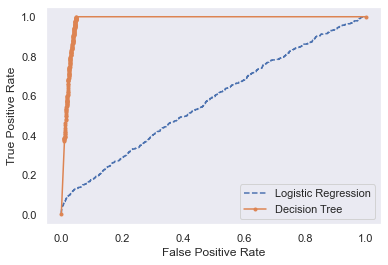

In [71]:
lr_fpr, lr_tpr, _ = roc_curve(y_o_test, y_o_scores_lr)
dt_fpr, dt_tpr, _ = roc_curve(y_o_test, y_o_scores_dt)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic Regression')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Based on the model validation scores, It is recommended to use Decision Tree model

## _k_-fold Cross-validation

#### Logistic Regression _k_-fold Cross-validation

In [72]:
# let's use three folds
k_folds = 3
clf_O_lr = LogisticRegression(solver='liblinear', random_state=1111)
auc_scores = []

for k in range(k_folds):
    
    X_train_k, X_test_k, y_train_k, y_test_k = \
        train_test_split(X_O, y_o, test_size=1/k_folds)

    clf_O_lr.fit(X_train_k, y_train_k)
    
    y_scores_k = clf_O_lr.predict_proba(X_test_k)[:, 1]

    # calcualte AUC
    auc = roc_auc_score(y_test_k, y_scores_k)
    
    auc_scores.append(auc)
    
print('AUC Scores: ', auc_scores)
print('Mean AUC Score: ', sum(auc_scores)/len(auc_scores))

AUC Scores:  [0.5783522244387415, 0.5785551142916046, 0.5742464770029714]
Mean AUC Score:  0.5770512719111057


#### Decision Tree _k_-fold Cross-validation

In [73]:
# let's use three folds
k_folds = 3
clf_O_dt = DecisionTreeClassifier(class_weight='balanced', random_state=1111)
auc_scores = []

for k in range(k_folds):
    
    X_train_k, X_test_k, y_train_k, y_test_k = \
        train_test_split(X_O, y_o, test_size=1/k_folds)

    clf_O_dt.fit(X_train_k, y_train_k)
    
    y_scores_k = clf_O_dt.predict_proba(X_test_k)[:, 1]

    # calcualte AUC
    auc = roc_auc_score(y_test_k, y_scores_k)
    
    auc_scores.append(auc)
    
print('AUC Scores: ', auc_scores)
print('Mean AUC Score: ', sum(auc_scores)/len(auc_scores))

AUC Scores:  [0.982731523641975, 0.9801014631896984, 0.9804604868577982]
Mean AUC Score:  0.9810978245631571


# Model building without oversampling

### Logistic Regression Model

In [74]:
clf = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=1111)
#train (fit) the model using the training sample
clf.fit(X_NO_train, y_no_train)

#make predictions on the test dataset
y_preds = clf.predict(X_NO_test)

# calculate the probabilities on the test dataset
y_scores_lr = clf.predict_proba(X_NO_test)[:, 1]

print('Mean of probability scores for LR: ', clf.predict_proba(X_NO_train)[:, 1].mean())

Mean of probability scores for LR:  0.47845682528848904


In [75]:
print('Logistic Regression Performance Metrics')
print('')
LR_AUC = model_accuracy_scores(y_no_test, y_preds, y_scores_lr)

Logistic Regression Performance Metrics

AUC score:  0.5097525170823575
Accuracy Score:  0.6436990744403133

Confusion Matrix
col_0   0.0   1.0
purch            
0.0    8077  4398
1.0     106    60

F1 score:  0.40396232129044407
Precision score:  0.5002526328670426
Recall score:  0.5044503464760847


In [76]:
# Classification report to check if scores are even or uneven for each class
print(classification_report(y_no_test, y_preds, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.99      0.65      0.78     12475
           1       0.01      0.36      0.03       166

    accuracy                           0.64     12641
   macro avg       0.50      0.50      0.40     12641
weighted avg       0.97      0.64      0.77     12641



### Logistic Regression model scores are not evenly distributed for each of the classes

### Decision Tree Model

In [77]:
# Create Decision Tree classifer object
D_clf = DecisionTreeClassifier(class_weight='balanced', random_state=1111)

# Train Decision Tree Classifer
D_clf = D_clf.fit(X_NO_train, y_no_train)

#Predict the response for test dataset
y_pred = D_clf.predict(X_NO_test)

# calculate the probabilities on the test dataset
y_scores_dt = D_clf.predict_proba(X_NO_test)[:, 1]

print('Mean of probability scores for DT: ', D_clf.predict_proba(X_NO_train)[:, 1].mean())

Mean of probability scores for DT:  0.04028396755842838


In [78]:
print('Decision Tree Performance Metrics')
print('')
DT_AUC = model_accuracy_scores(y_no_test, y_pred, y_scores_dt)

Decision Tree Performance Metrics

AUC score:  0.5181768355989086
Accuracy Score:  0.952139862352662

Confusion Matrix
col_0    0.0  1.0
purch            
0.0    12024  451
1.0      154   12

F1 score:  0.50680758950126
Precision score:  0.5066360859631804
Recall score:  0.5180684260086438


In [79]:
# Classification report to check if scores are even or uneven for each class
print(classification_report(y_no_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     12475
           1       0.03      0.07      0.04       166

    accuracy                           0.95     12641
   macro avg       0.51      0.52      0.51     12641
weighted avg       0.97      0.95      0.96     12641



### Decision Tree model scores are not evenly distributed for each of the classes

### Pearson Correlation

In [80]:
y_scores_lr
y_scores_dt

df_y_scores = pd.DataFrame(y_scores_lr, y_scores_dt).reset_index().rename(columns={0: 'Dec_Tree', 'index': 'Log_Reg'})

df_y_scores.head()

pearsoncorr = df_y_scores.corr(method='pearson')

pearsoncorr

,Log_Reg,Dec_Tree
Log_Reg,1.00000,0.06563
Dec_Tree,0.06563,1.00000


### ROC AUC Curve

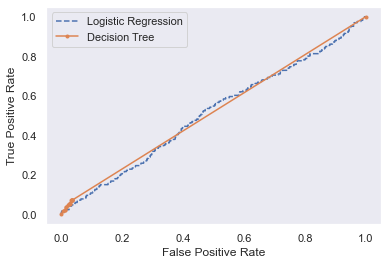

In [81]:
lr_fpr, lr_tpr, _ = roc_curve(y_no_test, y_scores_lr)
dt_fpr, dt_tpr, _ = roc_curve(y_no_test, y_scores_dt)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic Regression')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Based on the model validation scores, It is recommended to use Decision Tree model because it is an imbalanced dataset and AUC, Accuracy and F1 score is higher than the Logistic Regression Model.

## _k_-fold Cross-validation

### Logistic Regression _k_-fold Cross-validation

In [82]:
# let's use three folds
k_folds = 3
clf = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=1111)
auc_scores = []

for k in range(k_folds):
    
    X_train_k, X_test_k, y_train_k, y_test_k = \
        train_test_split(X_NO, y_no, test_size=1/k_folds)

    clf.fit(X_train_k, y_train_k)
    
    y_scores_k = clf.predict_proba(X_test_k)[:, 1]

    # calcualte AUC
    auc = roc_auc_score(y_test_k, y_scores_k)
    
    auc_scores.append(auc)
    
print('AUC Scores: ', auc_scores)
print('Mean AUC Score: ', sum(auc_scores)/len(auc_scores))

AUC Scores:  [0.5561685400043914, 0.5632826145311911, 0.5296690774279811]
Mean AUC Score:  0.5497067439878546


### Decision Tree _k_-fold Cross-validation

In [83]:
# let's use three folds
k_folds = 3
D_clf = DecisionTreeClassifier(class_weight='balanced', random_state=1111)
auc_scores = []

for k in range(k_folds):
    
    X_train_k, X_test_k, y_train_k, y_test_k = \
        train_test_split(X_NO, y_no, test_size=1/k_folds)

    clf.fit(X_train_k, y_train_k)
    
    y_scores_k = clf.predict_proba(X_test_k)[:, 1]

    # calcualte AUC
    auc = roc_auc_score(y_test_k, y_scores_k)
    
    auc_scores.append(auc)
    
print('AUC Scores: ', auc_scores)
print('Mean AUC Score: ', sum(auc_scores)/len(auc_scores))

AUC Scores:  [0.5657219821538807, 0.573879945479997, 0.5355445421922284]
Mean AUC Score:  0.5583821566087019
